# 使用matplotlib绘制ginseng色谱图


In [1]:
data_file = 'ginseng.mat'
import numpy as np
import scipy.io
import matplotlib.pyplot as plt
data = scipy.io.loadmat(data_file)
data

{'__header__': b'MATLAB 5.0 MAT-file, Platform: PCWIN, Created on: Sat May 21 16:35:56 2011',
 '__version__': '1.0',
 '__globals__': [],
 't': array([[3.28333328e-03],
        [6.61680551e-03],
        [9.95027774e-03],
        ...,
        [7.99966164e+01],
        [7.99999499e+01],
        [8.00032833e+01]]),
 'X': array([[22.42796898, 21.06695938, 23.89208031, ..., 21.58403015,
         22.42796898, 23.69928932],
        [22.42812922, 21.06307955, 23.89241027, ..., 21.58267013,
         22.42812922, 23.70055019],
        [22.42873002, 21.05962894, 23.89210894, ..., 21.58076842,
         22.42873002, 23.70187975],
        ...,
        [24.05906869, 21.91725932, 23.87911987, ..., 21.37942883,
         24.05906869, 23.85700061],
        [24.05949017, 21.91725922, 23.87961002, ..., 21.37858016,
         24.05949017, 23.85581036],
        [24.05904007, 21.91613007, 23.88043976, ..., 21.37740898,
         24.05904007, 23.85470963]])}

In [2]:
data['X'].shape, data['t'].shape # ((24000, 32), (24000, 1))

((24000, 32), (24000, 1))

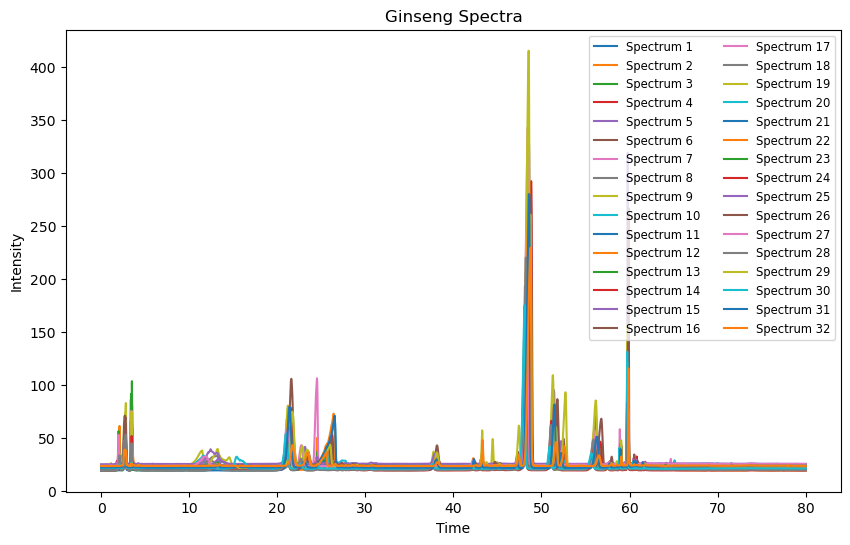

In [3]:
plt.figure(figsize=(10, 6))
for i in range(data['X'].shape[1]):
    plt.plot(data['t'], data['X'][:, i], label=f'Spectrum {i+1}')

plt.xlabel('Time')
plt.ylabel('Intensity')
plt.title('Ginseng Spectra')
plt.legend(loc='upper right', fontsize='small', ncol=2)
plt.show()

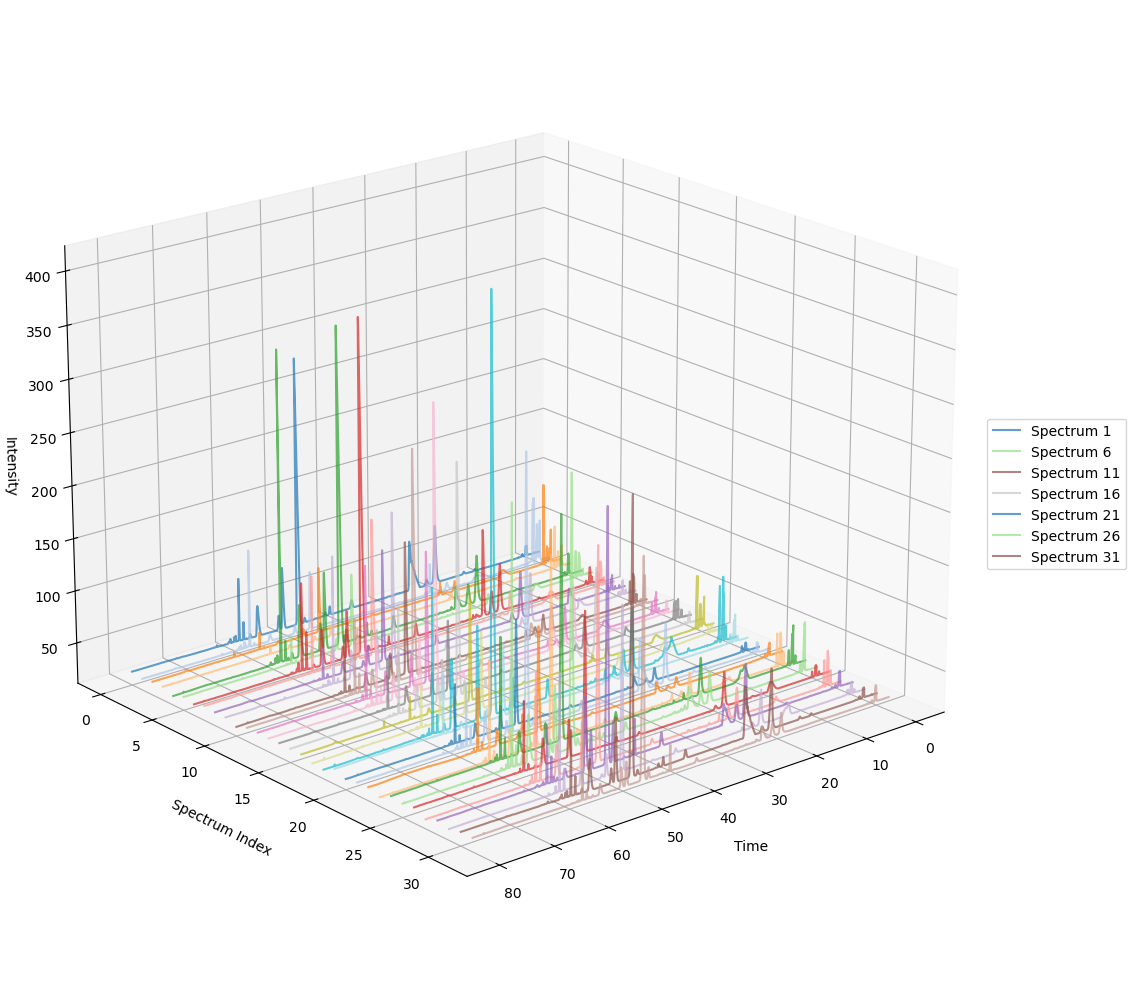

In [67]:

fig = plt.figure(figsize=(16, 10))  # Increased figure size
ax = fig.add_subplot(111, projection='3d')

# Increase spacing between spectra and add transparency
spacing_factor = 1  # Increase spacing between spectrum lines
# Use distinct colors instead of gradient
distinct_colors = plt.cm.tab20(np.arange(32) % 20)

# 绘制三维曲线
for i in range(data['X'].shape[1]):
    ax.plot(data['t'].flatten(), 
            [i * spacing_factor] * len(data['t']), 
            data['X'][:, i], 
            color=distinct_colors[i],
            alpha=0.7,
            label=f'Spectrum {i+1}' if i % 5 == 0 else None)

ax.set_xlabel('Time', labelpad=10)
ax.set_ylabel('Spectrum Index', labelpad=10)
# ax.set_yticks([])
ax.set_zlabel('Intensity', labelpad=5)  # Increased label padding and rotated label

# Customize z-axis label orientation for better readability
# ax.zaxis.set_rotate_label(False)  # Disable automatic rotation
# ax.set_zlabel('Intensity', labelpad=5, )

# ax.set_title('3D View of Ginseng Spectra', fontsize=14)
# ax.grid(False)
# Adjust view angle for better visualization
ax.view_init(elev=20, azim=50)  # Adjusted view angle

# 将图例放在图外
ax.legend(loc='center left', bbox_to_anchor=(1.0, 0.5), ncol=1)


plt.tight_layout()
plt.show()
